In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

# Add this color map (used by plotting functions)
CLASS_COLOR_MAP = {
    "Appendicularia":     "#1f77b4",
    "Thaliacea":          "#ff7f0e",
    "Cnidaria<Metazoa":   "#e83c12",
    "Copepoda_total":     "#2ca02c",
    "Rhizaria":           "#9467bd",
    "Trichodesmium":      "#17becf",
}

plot_path='C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots'

In [3]:
uvp5_data = pd.read_csv("/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/ecotaxa_export__TSV_17905_20250826_1223.tsv", sep="\t")
crop_df = pd.DataFrame(uvp5_data)

# UVP5 profiles
#UVP5_CTD-37 = "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5 data/export_detailed_20250924_08_40_PAR_c_m181_037.tsv"
#UVP5_CTD-50 = "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5 data/export_detailed_20250924_08_40_PAR_c_m181_050.tsv"
#UVP5_CTD-60 = "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5 data/export_detailed_20250924_08_40_PAR_c_m181_060.tsv"
#UVP5_CTD-75 = "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5 data/export_detailed_20250924_08_40_PAR_c_m181_075.tsv"
#UVP5_CTD-81 = "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5 data/export_detailed_20250924_08_40_PAR_c_m181_081.tsv"



# List of file paths
profile_files = [
    "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_037.tsv",
    "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_050.tsv",
    "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_060.tsv",
    "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_075.tsv",
    "/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/ET_data/UVP5_data/export_detailed_20250924_08_40_PAR_c_m181_081.tsv"
]

# Read and concatenate all profiles
volume_df = pd.concat([pd.read_csv(f, sep="\t", encoding="latin1") for f in profile_files], ignore_index=True)

# Add a 'profile' column to uvp5_df
crop_df['profile'] = crop_df['object_id'].str.split('_').str[:3].str.join('_')

# Combine Calanoida and Copepoda into one category
crop_df['object_annotation_category'] = crop_df['object_annotation_category'].replace(
    {'Calanoida': 'Copepoda_total', 'Copepoda<Maxillopoda': 'Copepoda_total', 'puff': 'Trichodesmium'}
)

columns_list = crop_df.columns.tolist()
print(columns_list)

columns_metadata_list = volume_df.columns.tolist()
print(columns_metadata_list)

['object_id', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_link', 'object_depth_min', 'object_depth_max', 'object_annotation_status', 'object_annotation_person_name', 'object_annotation_person_email', 'object_annotation_date', 'object_annotation_time', 'object_annotation_category', 'object_annotation_hierarchy', 'complement_info', 'object_area', 'object_mean', 'object_stddev', 'object_mode', 'object_min', 'object_max', 'object_x', 'object_y', 'object_xm', 'object_ym', 'object_perim.', 'object_bx', 'object_by', 'object_width', 'object_height', 'object_major', 'object_minor', 'object_angle', 'object_circ.', 'object_feret', 'object_intden', 'object_median', 'object_skew', 'object_kurt', 'object_%area', 'object_xstart', 'object_ystart', 'object_area_exc', 'object_fractal', 'object_skelarea', 'object_slope', 'object_histcum1', 'object_histcum2', 'object_histcum3', 'object_xmg5', 'object_ymg5', 'object_nb1', 'object_nb2', 'object_nb3', 'object_compentropy', 'object_compm

In [17]:
depth_min = crop_df['object_depth_min']
depth_max = crop_df['object_depth_max']
#print("Depth min:", depth_min)
#print("Depth max:", depth_max)

depth_min

0          27.0
1          27.0
2          34.2
3          35.6
4          36.1
          ...  
26462      41.9
26463      62.9
26464     188.6
26465     203.2
26466    2696.8
Name: object_depth_min, Length: 26467, dtype: float64

In [4]:
# Ensure bins are sorted and unique
depth_bins = np.sort(volume_df['Depth [m]'].unique())
crop_df['depth_bin'] = pd.cut(
    crop_df['object_depth_min'],
    bins=depth_bins,
    include_lowest=True,
    right=False
)

depth_bins = np.sort(volume_df['Depth [m]'].unique())
crop_df['depth_bin'] = pd.cut(
    crop_df['object_depth_min'],
    bins=depth_bins,
    include_lowest=True,
    right=False
)

# 2. Count crops per class per bin
counts = crop_df.groupby(['sample_id', 'depth_bin', 'object_annotation_category']).size().reset_index(name='count')

# 3. Merge with sampled volume
counts = counts.merge(volume_df[['Profile', 'Depth [m]', 'Sampled volume [L]']],
                     left_on=['sample_id', 'depth_bin'], 
                     right_on=['Profile', 'Depth [m]'],
                     how='left')

# 4. Normalize
counts['count_per_liter'] = counts['count'] / counts['Sampled volume [L]']

print(counts.head())

C:\Users\fanny\AppData\Local\Temp\ipykernel_19508\601462971.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = crop_df.groupby(['sample_id', 'depth_bin', 'object_annotation_category']).size().reset_index(name='count')


    sample_id   depth_bin object_annotation_category  count Profile  \
0  c_m181_037  [2.5, 7.5)             Appendicularia      0     NaN   
1  c_m181_037  [2.5, 7.5)               Chaetognatha      1     NaN   
2  c_m181_037  [2.5, 7.5)           Cnidaria<Metazoa      0     NaN   
3  c_m181_037  [2.5, 7.5)             Copepoda_total      2     NaN   
4  c_m181_037  [2.5, 7.5)                  Crustacea      0     NaN   

   Depth [m]  Sampled volume [L]  count_per_liter  
0        NaN                 NaN              NaN  
1        NaN                 NaN              NaN  
2        NaN                 NaN              NaN  
3        NaN                 NaN              NaN  
4        NaN                 NaN              NaN  


In [5]:
# 1. Assign bin left edge as a new column
crop_df['depth_bin_left'] = crop_df['depth_bin'].apply(lambda x: x.left if pd.notnull(x) else np.nan)

# 2. Group and count as before
counts = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category']).size().reset_index(name='count')

# 3. Merge with volume_df
counts = counts.merge(
    volume_df[['Profile', 'Depth [m]', 'Sampled volume [L]']],
    left_on=['sample_id', 'depth_bin_left'],
    right_on=['Profile', 'Depth [m]'],
    how='left'
)

# 4. Normalize
counts['count_per_liter'] = counts['count'] / counts['Sampled volume [L]']

print(counts.head())

    sample_id  depth_bin_left object_annotation_category  count     Profile  \
0  c_m181_037             2.5             Appendicularia      0  c_m181_037   
1  c_m181_037             2.5               Chaetognatha      1  c_m181_037   
2  c_m181_037             2.5           Cnidaria<Metazoa      0  c_m181_037   
3  c_m181_037             2.5             Copepoda_total      2  c_m181_037   
4  c_m181_037             2.5                  Crustacea      0  c_m181_037   

   Depth [m]  Sampled volume [L]  count_per_liter  
0        2.5               43.68         0.000000  
1        2.5               43.68         0.022894  
2        2.5               43.68         0.000000  
3        2.5               43.68         0.045788  
4        2.5               43.68         0.000000  


C:\Users\fanny\AppData\Local\Temp\ipykernel_19508\1484082659.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category']).size().reset_index(name='count')


In [6]:
if 'volume_um3' not in crop_df.columns:
    crop_df['object_esd'] = pd.to_numeric(crop_df['object_esd'], errors='coerce')
    crop_df['volume_um3'] = (4/3) * np.pi * (crop_df['object_esd']/2)**3

# 1. Calculate total biovolume per bin/class
biovolume_df = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category'])['volume_um3'].sum().reset_index()

# 2. Merge with sampled volume
biovolume_df = biovolume_df.merge(
    volume_df[['Profile', 'Depth [m]', 'Sampled volume [L]']],
    left_on=['sample_id', 'depth_bin_left'],
    right_on=['Profile', 'Depth [m]'],
    how='left'
)

# 3. Normalize
biovolume_df['biovolume_per_liter'] = biovolume_df['volume_um3'] / biovolume_df['Sampled volume [L]']

# Now use biovolume['biovolume_per_liter'] for plotting

C:\Users\fanny\AppData\Local\Temp\ipykernel_19508\1537722555.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  biovolume_df = crop_df.groupby(['sample_id', 'depth_bin_left', 'object_annotation_category'])['volume_um3'].sum().reset_index()


In [7]:
def build_profile_class_summary(
    crop_df,
    volume_df,
    counts_df=None,
    biovolume_df=None,
    profile_col="sample_id",
    profile_id_col_in_volume="Profile",
    sampled_volume_col="Sampled volume [L]",
    use_si_scale=True,
    save_path=None
):
    """
    Build summary tables:
      - profile × class: counts, counts_per_L, volume (μm³), volume mm³, volume per L (μm³/L and mm³/L)
      - class totals across all profiles (same columns + combined per-L using total sampled volume)
    Returns (profile_class_summary, class_totals)
    If counts_df or biovolume_df missing they are computed from crop_df.
    If save_path provided, writes CSVs there.
    """

    UM3_TO_MM3 = 1e-9

    # 1) ensure sampled volumes per profile
    if profile_id_col_in_volume not in volume_df.columns or sampled_volume_col not in volume_df.columns:
        raise ValueError(f"volume_df must contain '{profile_id_col_in_volume}' and '{sampled_volume_col}'")
    sampled_vol = (
        volume_df.groupby(profile_id_col_in_volume, as_index=False)[sampled_volume_col]
        .sum()
        .rename(columns={profile_id_col_in_volume: profile_col, sampled_volume_col: "sampled_volume_L"})
    )

    # 2) counts per profile × class
    if counts_df is None:
        counts_pc = crop_df.groupby([profile_col, "object_annotation_category"]).size().reset_index(name="count")
    else:
        # if counts_df already aggregated, try to keep as-is otherwise aggregate
        if {"count", profile_col, "object_annotation_category"}.issubset(counts_df.columns):
            counts_pc = counts_df.groupby([profile_col, "object_annotation_category"], as_index=False)["count"].sum()
        else:
            counts_pc = counts_df.groupby([profile_col, "object_annotation_category"]).size().reset_index(name="count")

    # 3) biovolume per profile × class (μm³)
    if biovolume_df is None:
        tmp = crop_df.copy()
        if "volume_um3" not in tmp.columns:
            tmp["object_esd"] = pd.to_numeric(tmp["object_esd"], errors="coerce")
            tmp["volume_um3"] = (4.0 / 3.0) * np.pi * (tmp["object_esd"] / 2.0) ** 3
        bio_pc = tmp.groupby([profile_col, "object_annotation_category"], as_index=False)["volume_um3"].sum()
    else:
        if {"volume_um3", profile_col, "object_annotation_category"}.issubset(biovolume_df.columns):
            bio_pc = biovolume_df.groupby([profile_col, "object_annotation_category"], as_index=False)["volume_um3"].sum()
        else:
            raise ValueError("biovolume_df must contain columns: volume_um3, sample_id and object_annotation_category")

    # 4) merge counts + biovolume + sampled volume
    profile_class = pd.merge(counts_pc, bio_pc, on=[profile_col, "object_annotation_category"], how="outer")
    profile_class = profile_class.merge(sampled_vol, on=profile_col, how="left")
    profile_class["count"] = profile_class["count"].fillna(0).astype(float)
    profile_class["volume_um3"] = profile_class["volume_um3"].fillna(0).astype(float)

    # 5) compute normalized metrics
    profile_class["counts_per_L"] = profile_class["count"] / profile_class["sampled_volume_L"].replace({0: np.nan})
    profile_class["total_biovolume_mm3"] = profile_class["volume_um3"] * UM3_TO_MM3
    profile_class["biovolume_um3_per_L"] = profile_class["volume_um3"] / profile_class["sampled_volume_L"].replace({0: np.nan})
    profile_class["biovolume_mm3_per_L"] = profile_class["total_biovolume_mm3"] / profile_class["sampled_volume_L"].replace({0: np.nan})
    profile_class["avg_biovolume_per_indiv_mm3"] = (profile_class["total_biovolume_mm3"] / profile_class["count"].replace(0, np.nan)).fillna(0)

    # tidy ordering
    profile_class_summary = profile_class[
        [profile_col, "object_annotation_category", "sampled_volume_L", "count", "counts_per_L",
         "volume_um3", "biovolume_um3_per_L", "total_biovolume_mm3", "biovolume_mm3_per_L", "avg_biovolume_per_indiv_mm3"]
    ].copy()
    profile_class_summary = profile_class_summary.sort_values([profile_col, "biovolume_mm3_per_L"], ascending=[True, False])

    # 6) combined totals per class across profiles
    class_totals = profile_class_summary.groupby("object_annotation_category", as_index=False).agg(
        total_count=("count", "sum"),
        total_biovolume_um3=("volume_um3", "sum"),
    )
    class_totals["total_biovolume_mm3"] = class_totals["total_biovolume_um3"] * UM3_TO_MM3

    # combined per-L normalization uses total sampled volume across included profiles
    total_sampled_volume_L = sampled_vol["sampled_volume_L"].sum()
    if total_sampled_volume_L > 0:
        class_totals["biovolume_um3_per_L_combined"] = class_totals["total_biovolume_um3"] / total_sampled_volume_L
        class_totals["biovolume_mm3_per_L_combined"] = class_totals["total_biovolume_mm3"] / total_sampled_volume_L
        class_totals["counts_per_L_combined"] = class_totals["total_count"] / total_sampled_volume_L
    else:
        class_totals["biovolume_um3_per_L_combined"] = np.nan
        class_totals["biovolume_mm3_per_L_combined"] = np.nan
        class_totals["counts_per_L_combined"] = np.nan

    # 7) optional SI-style scaling (choose exponent based on combined totals so display is consistent)
    def si_scale(series):
        mx = series.abs().max()
        if pd.isna(mx) or mx == 0:
            return 0, 1.0, ""
        exp = int(np.floor(np.log10(mx)))
        k3 = (exp // 3) * 3
        factor = 10.0 ** k3
        prefix_map = { -12:'p', -9:'n', -6:'µ', -3:'m', 0:'', 3:'k', 6:'M', 9:'G', 12:'T' }
        prefix = prefix_map.get(k3, f"10^{k3}")
        return k3, factor, prefix

    if use_si_scale:
        # choose scale based on total mm3 across classes (compact unit)
        mm3_exp, mm3_factor, mm3_pref = si_scale(class_totals["total_biovolume_mm3"])
        class_totals["total_biovolume_mm3_scaled"] = class_totals["total_biovolume_mm3"] / mm3_factor
        class_totals["biovolume_mm3_per_L_combined_scaled"] = class_totals["biovolume_mm3_per_L_combined"] / mm3_factor
        class_totals["mm3_scale_exponent"] = mm3_exp

        # apply same mm3 scale to profile table
        profile_class_summary["total_biovolume_mm3_scaled"] = profile_class_summary["total_biovolume_mm3"] / mm3_factor
        profile_class_summary["biovolume_mm3_per_L_scaled"] = profile_class_summary["biovolume_mm3_per_L"] / mm3_factor
        profile_class_summary["mm3_scale_exponent"] = mm3_exp
    else:
        mm3_exp, mm3_factor, mm3_pref = 0, 1.0, ""

    # 8) add simple percentages to class_totals
    class_totals["count_percent"] = 100.0 * class_totals["total_count"] / class_totals["total_count"].sum()
    class_totals["biovolume_percent_mm3"] = 100.0 * class_totals["total_biovolume_mm3"] / class_totals["total_biovolume_mm3"].sum()

    # 9) save CSVs if requested
    outdir = save_path if save_path else os.getcwd()
    os.makedirs(outdir, exist_ok=True)
    profile_class_summary.to_csv(os.path.join(outdir, "profile_class_summary_full_precision.csv"), index=False, float_format="%.12e")
    class_totals.to_csv(os.path.join(outdir, "class_totals_combined_full_precision.csv"), index=False, float_format="%.12e")

    # also save a scaled human-readable CSV when SI scaling used
    if use_si_scale:
        class_totals.to_csv(os.path.join(outdir, "class_totals_combined_scaled.csv"), index=False, float_format="%.12e")
        profile_class_summary.to_csv(os.path.join(outdir, "profile_class_summary_scaled.csv"), index=False, float_format="%.12e")

    return profile_class_summary, class_totals

# Example usage (uncomment to run):
profile_summary, totals = build_profile_class_summary(crop_df, volume_df, counts_df=counts, biovolume_df=biovolume_df, save_path=plot_path)
display(profile_summary.head())
display(totals.sort_values('total_biovolume_mm3', ascending=False).head())

,sample_id,object_annotation_category,sampled_volume_L,count,counts_per_L,volume_um3,biovolume_um3_per_L,total_biovolume_mm3,biovolume_mm3_per_L,avg_biovolume_per_indiv_mm3,total_biovolume_mm3_scaled,biovolume_mm3_per_L_scaled,mm3_scale_exponent
13,c_m181_037,not-living,124570.88,7881.0,0.063265,1.083945e+07,87.014298,0.010839,8.701430e-08,0.000001,10.839448,0.000087,-3
7,c_m181_037,Rhizaria,124570.88,154.0,0.001236,8.582851e+05,6.889933,0.000858,6.889933e-09,0.000006,0.858285,0.000007,-3
1,c_m181_037,Chaetognatha,124570.88,7.0,0.000056,8.212848e+05,6.592912,0.000821,6.592912e-09,0.000117,0.821285,0.000007,-3
3,c_m181_037,Copepoda_total,124570.88,398.0,0.003195,6.534159e+05,5.245334,0.000653,5.245334e-09,0.000002,0.653416,0.000005,-3
8,c_m181_037,Trichodesmium,124570.88,112.0,0.000899,1.675510e+05,1.345026,0.000168,1.345026e-09,0.000001,0.167551,0.000001,-3


,object_annotation_category,total_count,total_biovolume_um3,total_biovolume_mm3,biovolume_um3_per_L_combined,biovolume_mm3_per_L_combined,counts_per_L_combined,total_biovolume_mm3_scaled,biovolume_mm3_per_L_combined_scaled,mm3_scale_exponent,count_percent,biovolume_percent_mm3
13,not-living,20545.0,4.094851e+07,0.040949,87.751376,8.775138e-08,0.044027,40.948513,0.000088,-3,78.153530,66.714534
1,Chaetognatha,34.0,4.426767e+06,0.004427,9.486423,9.486423e-09,0.000073,4.426767,0.000009,-3,0.129337,7.212221
2,Cnidaria<Metazoa,13.0,3.086205e+06,0.003086,6.613640,6.613640e-09,0.000028,3.086205,0.000007,-3,0.049452,5.028137
7,Rhizaria,779.0,3.046090e+06,0.003046,6.527674,6.527674e-09,0.001669,3.046090,0.000007,-3,2.963329,4.962780
3,Copepoda_total,1506.0,2.903791e+06,0.002904,6.222732,6.222732e-09,0.003227,2.903791,0.000006,-3,5.728850,4.730942


In [8]:
# Aggregate totals across the whole dataset (ignore profile)
counts_tot = counts.groupby('object_annotation_category')['count'].sum().rename('total_count')
bio_tot   = biovolume_df.groupby('object_annotation_category')['volume_um3'].sum().rename('total_biovolume_um3')

summary = pd.concat([counts_tot, bio_tot], axis=1).fillna(0)

# ensure mm³ column (1 mm³ = 1e9 μm³)
summary['total_biovolume_mm3'] = summary['total_biovolume_um3'] * 1e-9

# --- compute total sampled volume across profiles (robust to column name) ---
if 'Sampled volume [L]' in volume_df.columns:
    total_sampled_volume_L = volume_df['Sampled volume [L]'].sum()
elif 'sampled_volume_L' in volume_df.columns:
    total_sampled_volume_L = volume_df['sampled_volume_L'].sum()
else:
    total_sampled_volume_L = np.nan

# --- SI-style scaling helper (choose exponent as multiple of 3) ---
SI_PREFIX = { -12:'p', -9:'n', -6:'µ', -3:'m', 0:'', 3:'k', 6:'M', 9:'G', 12:'T' }
def si_scale(series):
    """Return (exponent, factor, prefix) where factor = 10**exponent and exponent is multiple of 3."""
    mx = series.abs().max()
    if pd.isna(mx) or mx == 0:
        return 0, 1.0, ''
    exp = int(np.floor(np.log10(mx)))
    k3 = (exp // 3) * 3
    factor = 10.0 ** k3
    prefix = SI_PREFIX.get(k3, f'10^{k3}')
    return k3, factor, prefix

# compute scale for biovolume totals (choose which unit to present to users; mm3 is often compact)
um3_exp, um3_factor, um3_pref = si_scale(summary['total_biovolume_um3'])
mm3_exp, mm3_factor, mm3_pref = si_scale(summary['total_biovolume_mm3'])

# optionally compute scale for counts as well (useful if counts are very large)
counts_exp, counts_factor, counts_pref = si_scale(summary['total_count'])

# --- NEW: compute normalized counts (counts per L) across the dataset ---
summary['total_count_per_L'] = summary['total_count'] / total_sampled_volume_L
counts_per_L_exp, counts_per_L_factor, counts_per_L_pref = si_scale(summary['total_count_per_L'])

# add scaled columns (keep originals intact)
summary['total_biovolume_um3_scaled'] = summary['total_biovolume_um3'] / um3_factor
summary['total_biovolume_mm3_scaled'] = summary['total_biovolume_mm3'] / mm3_factor
summary['total_count_scaled'] = summary['total_count'] / counts_factor
summary['total_count_per_L_scaled'] = summary['total_count_per_L'] / counts_per_L_factor

# percentages and average per individual (use mm³ for avg)
summary['count_percent'] = 100.0 * summary['total_count'] / summary['total_count'].sum()
summary['biovolume_percent_mm3'] = 100.0 * summary['total_biovolume_mm3'] / summary['total_biovolume_mm3'].sum()
summary['avg_biovolume_per_indiv_mm3'] = (summary['total_biovolume_mm3'] / summary['total_count'].replace(0, np.nan)).fillna(0)

# sort by total biovolume (mm³) descending
summary = summary.sort_values('total_biovolume_mm3', ascending=False)

# Print scaled view and indicate the chosen scale factors/prefixes (include normalized counts)
display_cols = ['total_count', 'total_count_scaled', 'total_count_per_L', 'total_count_per_L_scaled',
                'total_biovolume_um3', 'total_biovolume_um3_scaled',
                'total_biovolume_mm3', 'total_biovolume_mm3_scaled']
print('Totals per class (full precision + scaled columns):')
print(summary[display_cols].head(20).to_string())
print(f"\nScale info: total_biovolume_um3_scaled ×10^{um3_exp} ({um3_pref}×), total_biovolume_mm3_scaled ×10^{mm3_exp} ({mm3_pref}×)")
print(f"Counts scaled: total_count_scaled ×10^{counts_exp} ({counts_pref}×) — counts_per_L_scaled ×10^{counts_per_L_exp} ({counts_per_L_pref}×)")

# Save scaled summary (include exponent metadata so CSV consumer knows the scale)
save_totals = summary.reset_index().copy().rename(columns={'index':'object_annotation_category'})
save_totals['um3_scale_exponent'] = um3_exp
save_totals['mm3_scale_exponent'] = mm3_exp
save_totals['counts_scale_exponent'] = counts_exp
save_totals['counts_per_L_scale_exponent'] = counts_per_L_exp

# ensure summary_path is defined; default to current working dir if not
if 'summary_path' not in globals():
    summary_path = os.getcwd()
os.makedirs(summary_path, exist_ok=True)

save_totals.to_csv(os.path.join(summary_path, 'class_totals_full_and_scaled.csv'), index=False, float_format='%.12e')

# quick check output
print(f"Saved scaled totals to: {os.path.join(summary_path, 'class_totals_full_and_scaled.csv')}")

Totals per class (full precision + scaled columns):
                            total_count  total_count_scaled  total_count_per_L  total_count_per_L_scaled  total_biovolume_um3  total_biovolume_um3_scaled  total_biovolume_mm3  total_biovolume_mm3_scaled
object_annotation_category                                                                                                                                                                                
not-living                        20545              20.545           0.044027                 44.027289         4.094851e+07                   40.948513             0.040949                   40.948513
Chaetognatha                         34               0.034           0.000073                  0.072861         4.426767e+06                    4.426767             0.004427                    4.426767
Cnidaria<Metazoa                     13               0.013           0.000028                  0.027859         3.086205e+06           

In [9]:
def plot_biovolume_vs_depth_stacked_normalized(biovolume_df, main_groups=None, group_colors=None, plot_path=None, unit='mm3'):
    """
    Plot stacked horizontal bar charts of biovolume vs. depth for each profile.
    biovolume_df.biovolume_per_liter is expected in μm³ L⁻¹ if present.
    unit: 'um3' (µm³) or 'mm3' (mm³ L⁻¹). Default is 'mm3' (mm³ L⁻¹).
    """

    unit_map = {'um3': (1, 'µm³'), 'mm3': (1e9, 'mm³')}
    divisor, unit_label = unit_map.get(unit, unit_map['mm3'])

    cmap = plt.get_cmap('tab20')

    if main_groups is None:
        main_groups = [
            "Appendicularia", "Thaliacea",
            "Cnidaria<Metazoa", "Copepoda_total",
            "Rhizaria", "Trichodesmium"
        ]

    # use provided group_colors OR map from CLASS_COLOR_MAP, fallback to cmap
    if group_colors is None:
        group_colors = [CLASS_COLOR_MAP.get(g, cmap(i % cmap.N)) for i, g in enumerate(main_groups)]

    color_dict = dict(zip(main_groups, group_colors))

    profiles = biovolume_df['sample_id'].unique()
    for profile_name in profiles:
        prof = biovolume_df[biovolume_df['sample_id'] == profile_name]
        depth_bins = np.sort(prof['depth_bin_left'].dropna().unique())
        stacked_data = []
        for group in main_groups:
            group_vals = prof[prof['object_annotation_category'] == group]

            # prefer precomputed μm³/L if available
            if 'biovolume_per_liter' in group_vals.columns:
                vals_um3_per_L = pd.Series(group_vals.set_index('depth_bin_left')['biovolume_per_liter']).reindex(depth_bins, fill_value=0).values
            elif {'volume_um3','sampled_volume_L'}.issubset(group_vals.columns):
                vals_um3_per_L = pd.Series((group_vals['volume_um3'] / group_vals['sampled_volume_L']).values, index=group_vals['depth_bin_left']).reindex(depth_bins, fill_value=0).values
            else:
                raise ValueError("biovolume_df must contain either 'biovolume_per_liter' or both 'volume_um3' and 'sampled_volume_L' columns for conversion to per-L units")

            # convert from μm³ L⁻¹ to requested unit (e.g. mm³ L⁻¹ = μm³/L ÷ 1e9)
            vals_plot = vals_um3_per_L / divisor
            stacked_data.append(vals_plot)

        fig, ax = plt.subplots(figsize=(8, 7.5))
        bottom = np.zeros(len(depth_bins))
        for idx, group in enumerate(main_groups):
            values = stacked_data[idx]
            ax.barh(depth_bins, values, left=bottom, height=np.diff(np.append(depth_bins, depth_bins[-1]+1))*0.9,
                    color=color_dict[group], label=group, alpha=0.8)
            bottom += np.nan_to_num(values)
        # keep log scale optional; still useful for wide dynamic range
        try:
            ax.set_xscale('log')
        except Exception:
            pass
        ax.invert_yaxis()
        ax.set_ylim(top=0, bottom=2000)
        ax.set_title(f"{profile_name[:18]}")
        ax.set_xlabel(f'Biovolume [{unit_label} L⁻¹]')
        ax.set_ylabel('Depth [m]')
        ax.legend(fontsize='x-small', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        if plot_path:
            filename = f"biovolume_vs_depth_stacked_{profile_name[:18]}_{unit}.png"
            plt.savefig(os.path.join(plot_path, filename), dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

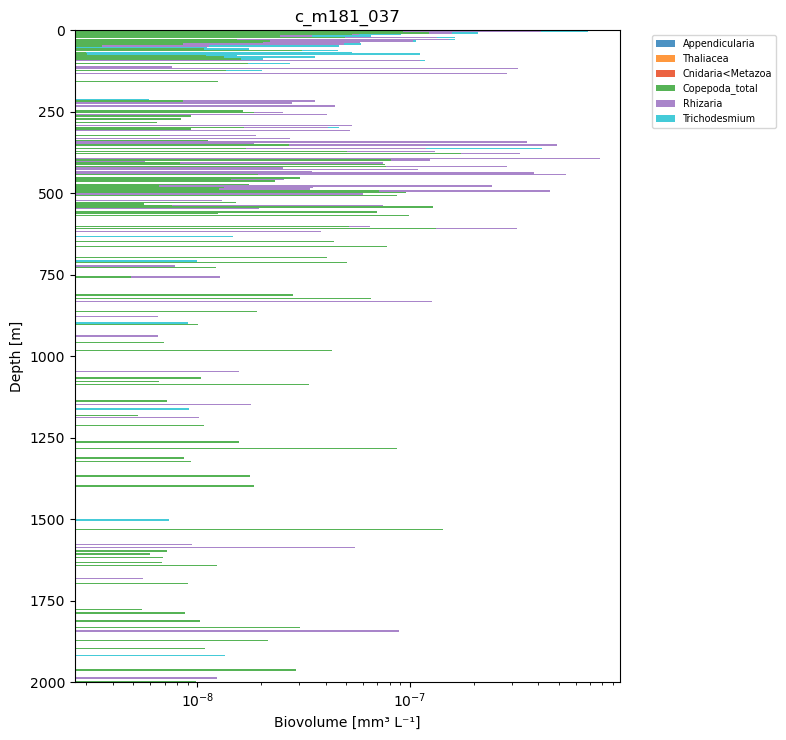

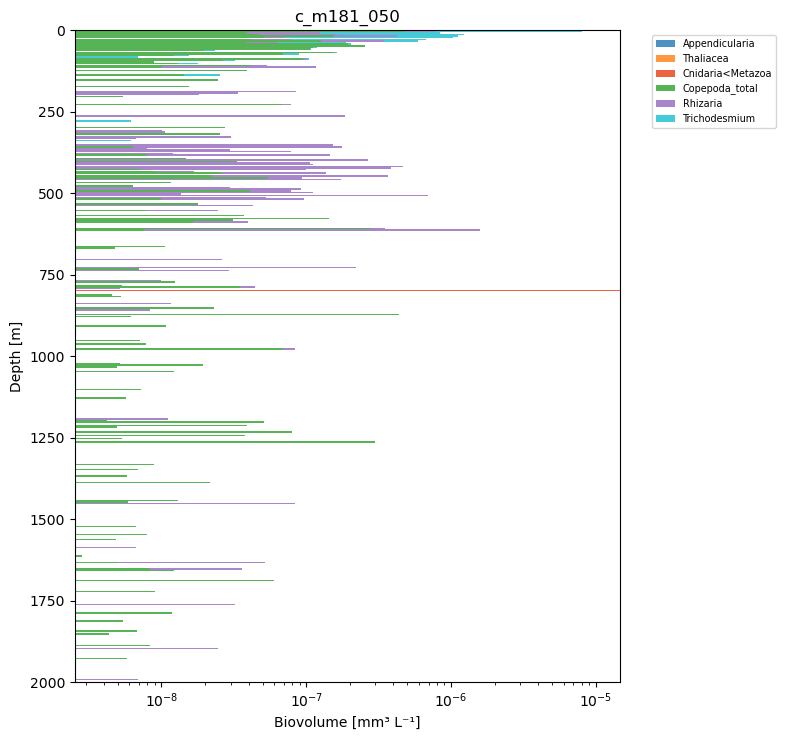

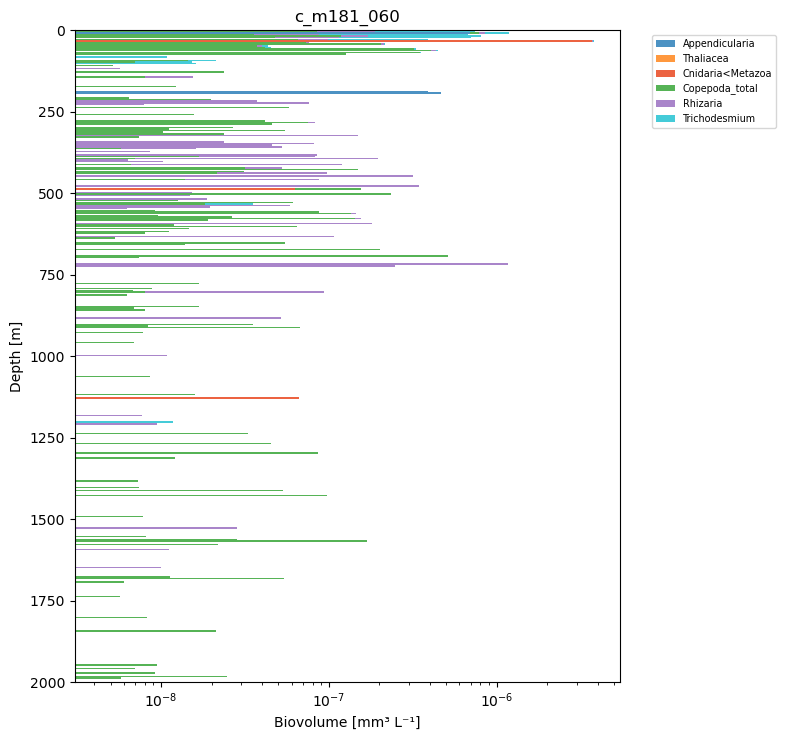

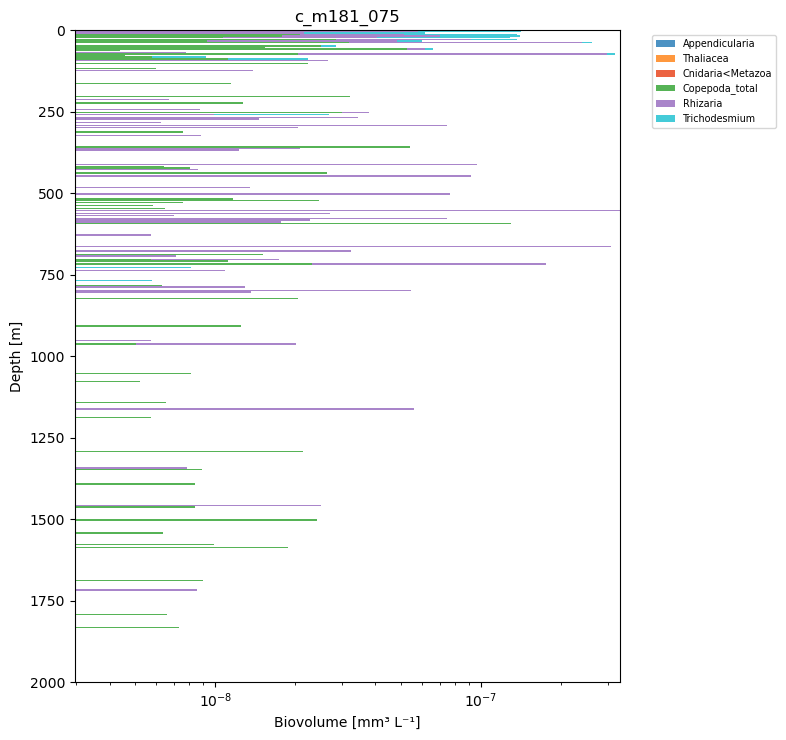

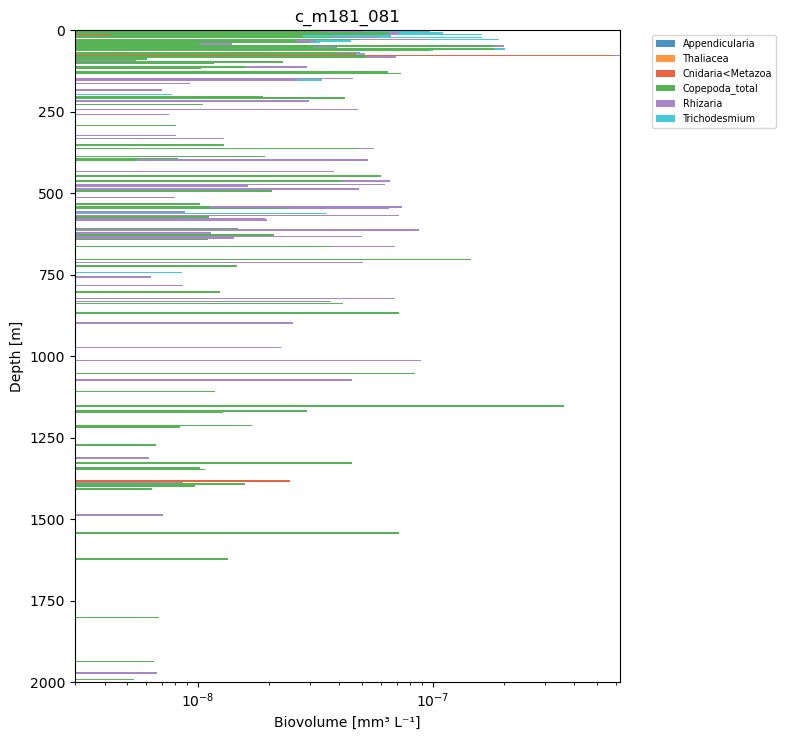

In [10]:
plot_biovolume_vs_depth_stacked_normalized(biovolume_df)

Saved counts figure to: C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots\profile_stacked_counts_mm3.png
Saved biovolume figure to: C:/Users/fanny/OneDrive - Van Hall Larenstein/HVHL/Year_IV/Thesis_Internship/plots\profile_stacked_biovolume_mm3.png


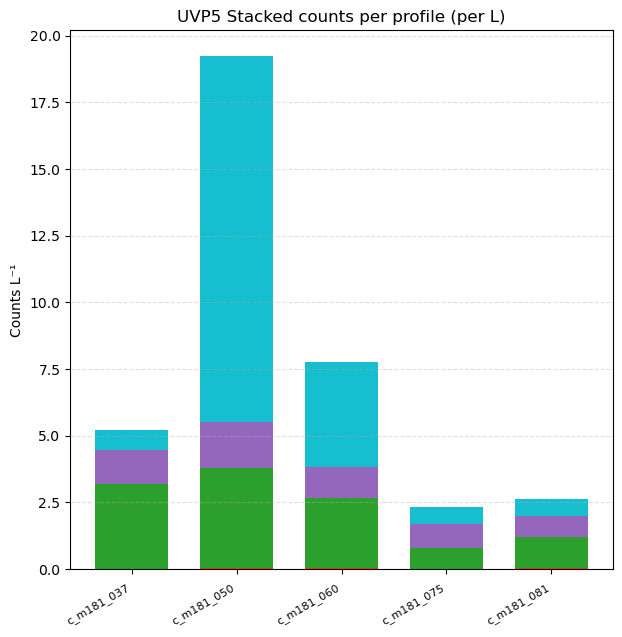

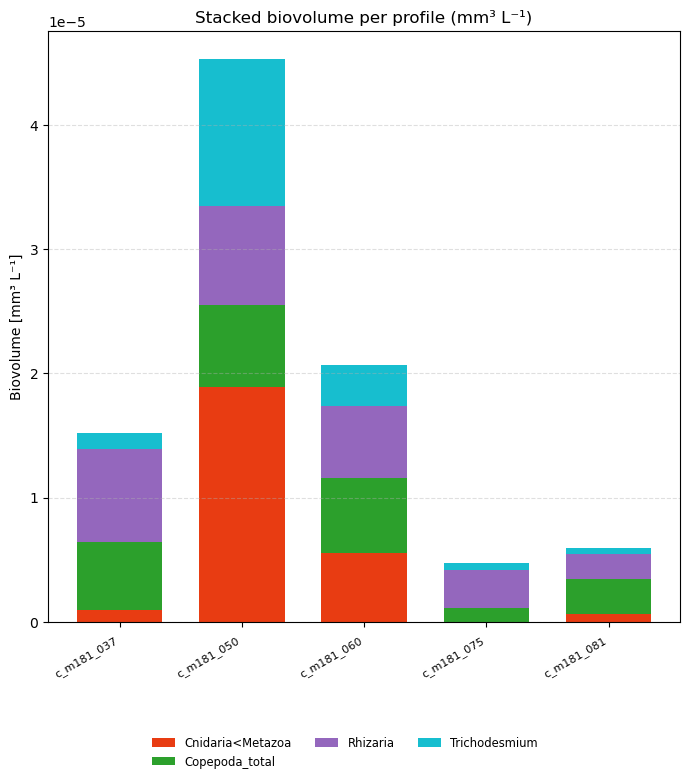

((<Figure size 700x700 with 1 Axes>, <Figure size 700x700 with 1 Axes>),
 (<Axes: title={'center': 'UVP5 Stacked counts per profile (per L)'}, ylabel='Counts L⁻¹'>,
  <Axes: title={'center': 'Stacked biovolume per profile (mm³ L⁻¹)'}, ylabel='Biovolume [mm³ L⁻¹]'>),
 object_annotation_category  Cnidaria<Metazoa  Copepoda_total  Rhizaria  \
 sample_id                                                                
 c_m181_037                          0.010032        3.189954  1.280748   
 c_m181_050                          0.022074        3.759249  1.739627   
 c_m181_060                          0.040223        2.611855  1.191011   
 c_m181_075                          0.000000        0.783310  0.911775   
 c_m181_081                          0.034249        1.169351  0.767673   
 
 object_annotation_category  Trichodesmium  
 sample_id                                  
 c_m181_037                       0.715136  
 c_m181_050                      13.728585  
 c_m181_060               

In [11]:
def plot_profile_stacked_counts_and_biovolume(
    counts_df,
    biovolume_df,
    unit='mm3',
    top_n=None,
    plot_path=None,
    figsize=(12, 6),
    profile_order=None,
    cmap_name='tab20',
    include_categories=None,
    exclude_categories=None,
    category_colors=None,
    id_col=None,
):
    """Plot stacked counts and stacked biovolume per profile as two separate images.
    Returns ((fig_counts, fig_bio), (ax_counts, ax_bio), agg_counts, agg_bio_per_unit_per_L).
    """
    import os
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    # unit conversion map: divisor to convert μm³ -> requested display unit
    unit_map = {'um3': (1, 'µm³'), 'mm3': (1e9, 'mm³')}
    divisor, unit_label = unit_map.get(unit, unit_map['mm3'])

    # defaults
    if include_categories is None:
        include_categories = [
            'Appendicularia', 'Thaliacea', 'Cnidaria<Metazoa',
            'Copepoda_total', 'Rhizaria', 'Trichodesmium'
        ]

    # prepare counts aggregation AS counts-per-L
    c = counts_df.copy()
    if 'count_per_liter' in c.columns:
        agg_counts = c.groupby(['sample_id', 'object_annotation_category'])['count_per_liter'].sum().unstack(fill_value=0)
    elif {'count','sampled_volume_L'}.issubset(c.columns):
        c['count_per_liter'] = c['count'] / c['sampled_volume_L'].replace({0: np.nan})
        agg_counts = c.groupby(['sample_id', 'object_annotation_category'])['count_per_liter'].sum().unstack(fill_value=0)
    elif 'count' in c.columns:
        agg_counts = c.groupby(['sample_id', 'object_annotation_category'])['count'].sum().unstack(fill_value=0)
        print("Warning: counts_df did not contain 'count_per_liter' or 'sampled_volume_L'; plotting absolute counts")
    else:
        agg_counts = c.groupby(['sample_id', 'object_annotation_category']).size().unstack(fill_value=0)

    # prepare biovolume aggregation AS μm³ per L, then convert to requested unit per L
    b = biovolume_df.copy()
    if 'biovolume_per_liter' in b.columns:
        agg_bio_um3_per_L = b.groupby(['sample_id', 'object_annotation_category'])['biovolume_per_liter'].sum().unstack(fill_value=0)
    elif {'volume_um3','sampled_volume_L'}.issubset(b.columns):
        b['biovolume_per_liter'] = b['volume_um3'] / b['sampled_volume_L'].replace({0: np.nan})
        agg_bio_um3_per_L = b.groupby(['sample_id', 'object_annotation_category'])['biovolume_per_liter'].sum().unstack(fill_value=0)
    else:
        raise ValueError("biovolume_df must contain either 'biovolume_per_liter' or both 'volume_um3' and 'sampled_volume_L' to compute per-L biovolume")

    # optionally keep top_n categories and group others (based on per-L totals)
    totals_bio = agg_bio_um3_per_L.sum(axis=0).sort_values(ascending=False)
    if top_n is not None and top_n < len(totals_bio):
        top_cats = totals_bio.index[:top_n].tolist()
        other_cats = [col for col in agg_bio_um3_per_L.columns if col not in top_cats]
        if other_cats:
            agg_bio_um3_per_L['Other'] = agg_bio_um3_per_L[other_cats].sum(axis=1)
            agg_counts['Other'] = agg_counts.reindex(columns=other_cats, fill_value=0).sum(axis=1)
        keep_cols = top_cats + (['Other'] if other_cats else [])
    else:
        keep_cols = list(totals_bio.index)

    # restrict to include_categories if provided
    if include_categories:
        filtered = [cat for cat in include_categories if cat in keep_cols]
        if filtered:
            keep_cols = filtered

    agg_counts = agg_counts.reindex(columns=keep_cols, fill_value=0)
    agg_bio_um3_per_L = agg_bio_um3_per_L.reindex(columns=keep_cols, fill_value=0)

    # convert biovolume (μm³ L⁻¹) to requested unit (e.g. mm³ L⁻¹)
    agg_bio_per_unit_per_L = agg_bio_um3_per_L / divisor

    # order profiles
    profiles = agg_counts.index.tolist()
    if profile_order is None:
        profiles = sorted(profiles)
    else:
        profiles = [p for p in profile_order if p in agg_counts.index] + [p for p in sorted(agg_counts.index) if p not in (profile_order or [])]
    agg_counts = agg_counts.reindex(index=profiles, fill_value=0)
    agg_bio_per_unit_per_L = agg_bio_per_unit_per_L.reindex(index=profiles, fill_value=0)

    categories = agg_counts.columns.tolist()

    # colors: prefer explicit category_colors if provided, else CLASS_COLOR_MAP, else cmap
    cmap = plt.get_cmap(cmap_name)
    if category_colors:
        colors = [category_colors.get(cat, CLASS_COLOR_MAP.get(cat, cmap(i % cmap.N))) for i, cat in enumerate(categories)]
    else:
        colors = [CLASS_COLOR_MAP.get(cat, cmap(i % cmap.N)) for i, cat in enumerate(categories)]

    # === PLOT COUNTS (separate figure) ===
    fig_counts, ax_counts = plt.subplots(1, 1, figsize=(figsize[0] / 2 if isinstance(figsize, tuple) else 8, figsize[1]))
    x = np.arange(len(profiles))
    width = 0.7
    bottom = np.zeros(len(profiles))
    for i, cat in enumerate(categories):
        vals = agg_counts[cat].values
        ax_counts.bar(x, vals, bottom=bottom, color=colors[i], label=cat, width=width)
        bottom += vals
    ax_counts.set_xticks(x)
    ax_counts.set_xticklabels(profiles, rotation=30, ha='right', fontsize=8)
    ax_counts.tick_params(axis='x', which='major', pad=6)
    ax_counts.set_ylabel('Counts L⁻¹')
    ax_counts.set_title('UVP5 Stacked counts per profile (per L)')
    ax_counts.grid(axis='y', linestyle='--', alpha=0.4)

    # === PLOT BIOVOLUME (separate figure) ===
    fig_bio, ax_bio = plt.subplots(1, 1, figsize=(figsize[0] / 2 if isinstance(figsize, tuple) else 8, figsize[1]))
    bottom = np.zeros(len(profiles))
    for i, cat in enumerate(categories):
        vals = agg_bio_per_unit_per_L[cat].values
        ax_bio.bar(x, vals, bottom=bottom, color=colors[i], label=cat, width=width)
        bottom += vals
    ax_bio.set_xticks(x)
    ax_bio.set_xticklabels(profiles, rotation=30, ha='right', fontsize=8)
    ax_bio.tick_params(axis='x', which='major', pad=6)
    ax_bio.set_ylabel(f'Biovolume [{unit_label} L⁻¹]')
    ax_bio.set_title(f'Stacked biovolume per profile ({unit_label} L⁻¹)')
    ax_bio.grid(axis='y', linestyle='--', alpha=0.4)

    # legend: use a single legend saved with the biovolume figure (outside axes)
    handles, labels = ax_bio.get_legend_handles_labels()
    # place legend below the biovolume figure to keep it visible when figures are separate
    fig_bio.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.12), ncol=3, fontsize='small', frameon=False)

    plt.tight_layout()

    # save separate images if requested
    if plot_path:
        os.makedirs(plot_path, exist_ok=True)
        fname_counts = os.path.join(plot_path, f'profile_stacked_counts_{unit}.png')
        fname_bio = os.path.join(plot_path, f'profile_stacked_biovolume_{unit}.png')
        fig_counts.savefig(fname_counts, dpi=300, bbox_inches='tight')
        fig_bio.savefig(fname_bio, dpi=300, bbox_inches='tight')
        print(f'Saved counts figure to: {fname_counts}')
        print(f'Saved biovolume figure to: {fname_bio}')

    plt.show()
    return (fig_counts, fig_bio), (ax_counts, ax_bio), agg_counts, agg_bio_per_unit_per_L

# example usage (now saves two separate images):
plot_profile_stacked_counts_and_biovolume(
    counts, biovolume_df,
    unit='mm3',
    top_n=6,
    plot_path=plot_path,
    figsize=(14, 7),
    profile_order=None,
    cmap_name='tab20',
    include_categories=None,
    exclude_categories=None,
    category_colors=None,
    id_col=None
)

In [ ]:
# Diagnostic check for UVP5 normalization
def diagnose_uvp5_normalization(crop_df, volume_df, counts_df):
    """
    Check UVP5 normalization calculations for potential issues
    """
    print("=== UVP5 NORMALIZATION DIAGNOSTICS ===")
    
    # Check sampled volumes
    print("\n1. Sampled Volume Statistics:")
    print(f"Volume_df sampled volume range: {volume_df['Sampled volume [L]'].min():.3f} - {volume_df['Sampled volume [L]'].max():.3f} L")
    print(f"Volume_df total sampled volume: {volume_df['Sampled volume [L]'].sum():.3f} L")
    print(f"Volume_df mean sampled volume: {volume_df['Sampled volume [L]'].mean():.3f} L")
    
    # Check unique profiles and their volumes
    profile_volumes = volume_df.groupby('Profile')['Sampled volume [L]'].sum()
    print(f"\nProfile volumes (L):")
    for profile, vol in profile_volumes.items():
        print(f"  {profile}: {vol:.3f} L")
    
    # Check raw counts vs normalized counts
    print("\n2. Count Statistics:")
    raw_counts_total = crop_df.groupby('object_annotation_category').size()
    normalized_counts_total = counts_df.groupby('object_annotation_category')['count_per_liter'].sum()
    
    print("Raw counts vs normalized counts per L:")
    for category in raw_counts_total.index:
        raw = raw_counts_total.get(category, 0)
        norm = normalized_counts_total.get(category, 0)
        print(f"  {category}: {raw} raw → {norm:.3f} counts/L")
    
    # Check depth binning
    print(f"\n3. Depth Binning:")
    print(f"Depth bins used: {len(volume_df['Depth [m]'].unique())} bins")
    print(f"Depth range: {volume_df['Depth [m]'].min():.1f} - {volume_df['Depth [m]'].max():.1f} m")
    
    # Check for potential double-counting or missing data
    print(f"\n4. Data Integrity:")
    print(f"Total crop records: {len(crop_df)}")
    print(f"Total count records after processing: {len(counts_df)}")
    print(f"Unique profiles in crop_df: {crop_df['sample_id'].nunique()}")
    print(f"Unique profiles in volume_df: {volume_df['Profile'].nunique()}")
    
    return profile_volumes

# Run diagnostic
profile_vols_uvp5 = diagnose_uvp5_normalization(crop_df, volume_df, counts)